In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/Users/yashs/Downloads/spotify.csv")


In [3]:
data.isnull().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [4]:
# Check for duplicates within rows
duplicates = data[data.duplicated(keep=False)]
duplicates

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms


In [5]:
data.describe()

,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,804.500000,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,464.911282,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,0.000000,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,402.250000,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,804.500000,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,1206.750000,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,1609.000000,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


(array([131., 122.,  94., 168., 274., 235., 207., 119.,  84.,  57.,  46.,
         23.,  15.,  13.,   6.,   4.,   3.,   3.,   2.,   4.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40., 44., 48.,
        52., 56., 60., 64., 68., 72., 76., 80.]),
 <BarContainer object of 20 artists>)

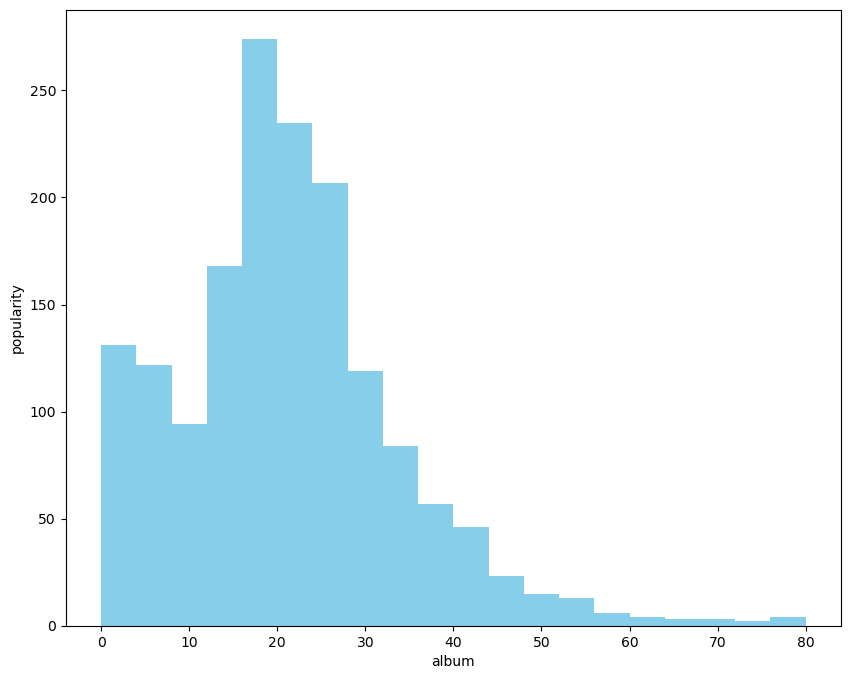

In [6]:
plt.figure(figsize=(10,8))
plt.xlabel('album')
plt.ylabel('popularity')
plt.hist(data['popularity'], bins=20,color='skyblue')

In [7]:
pop_threshold=40
data['pop_songs']=data['popularity'] > pop_threshold


In [8]:
pop_albums = data.groupby('album')['pop_songs'].sum().reset_index()
pop_albums = pop_albums.sort_values(by='pop_songs',ascending=False,ignore_index=True)
recommended_albums = pop_albums.head(5)
recommended_albums

,album,pop_songs
0,Exile On Main Street (2010 Re-Mastered),12
1,Sticky Fingers (Remastered),10
2,Tattoo You (2009 Re-Mastered),7
3,Honk (Deluxe),7
4,Let It Bleed,7


<Axes: title={'center': 'Recommended albums'}, xlabel='album', ylabel='pop_songs'>

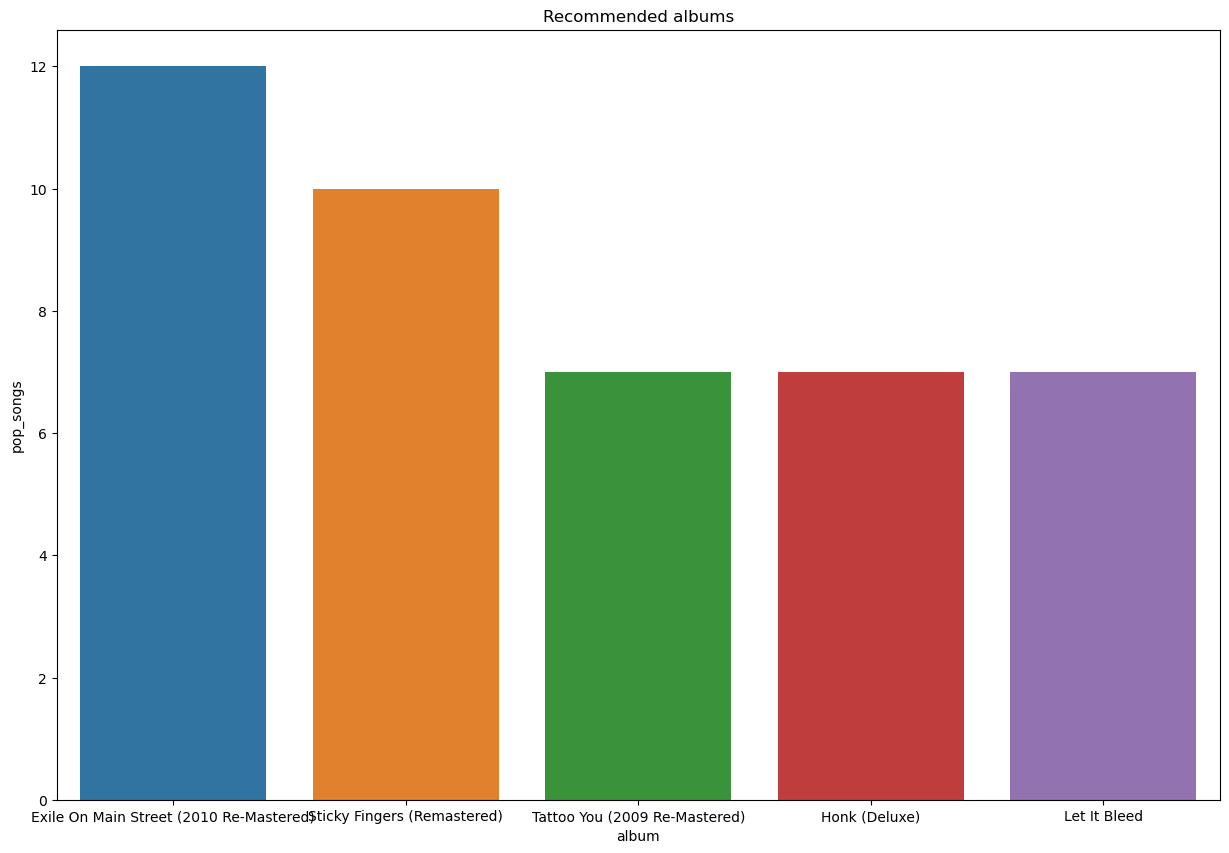

In [9]:
plt.figure(figsize=(15,10))
plt.xlabel('album')
plt.ylabel('pop songs')
plt.title('Recommended albums')
sns.barplot(x='album',y='pop_songs',data=recommended_albums)


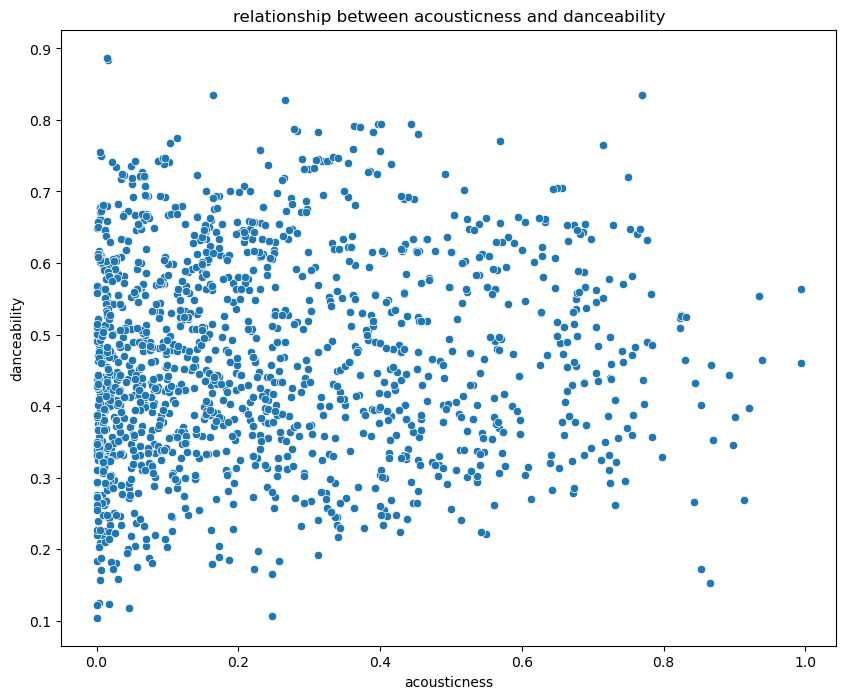

In [10]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='acousticness',y='danceability',data=data)
plt.xlabel('acousticness')
plt.ylabel('danceability')
plt.title('relationship between acousticness and danceability')
plt.show()


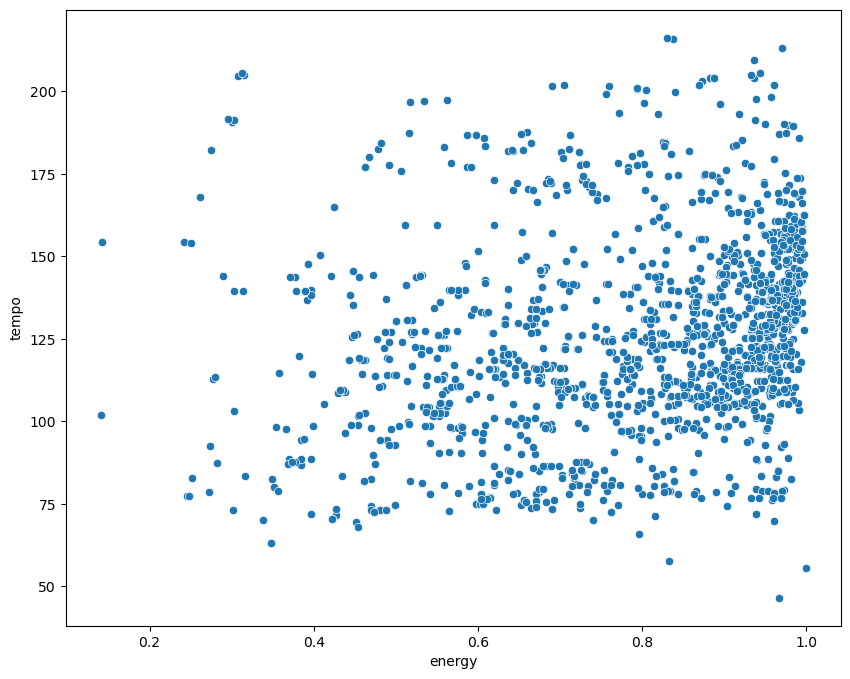

In [11]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='energy',y='tempo',data=data)
plt.xlabel('energy')
plt.ylabel('tempo')
plt.show()


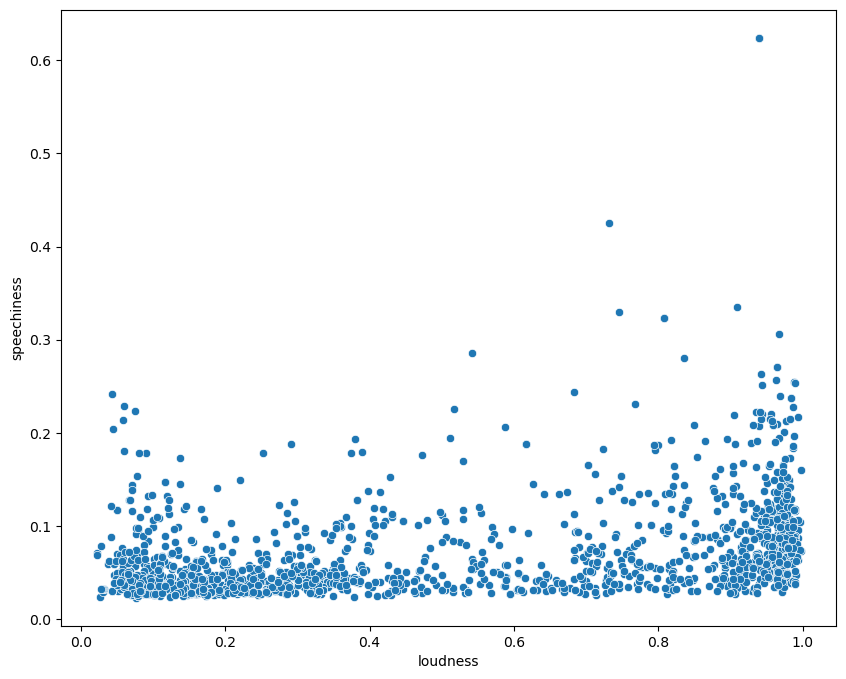

In [12]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='liveness',y='speechiness',data=data)
plt.xlabel('loudness')
plt.ylabel('speechiness')
plt.show()


In [13]:
data.dtypes

Unnamed: 0            int64
name                 object
album                object
release_date         object
track_number          int64
id                   object
uri                  object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity            int64
duration_ms           int64
pop_songs              bool
dtype: object

Text(0.5, 1.0, 'Relationship between song popularity and liveness')

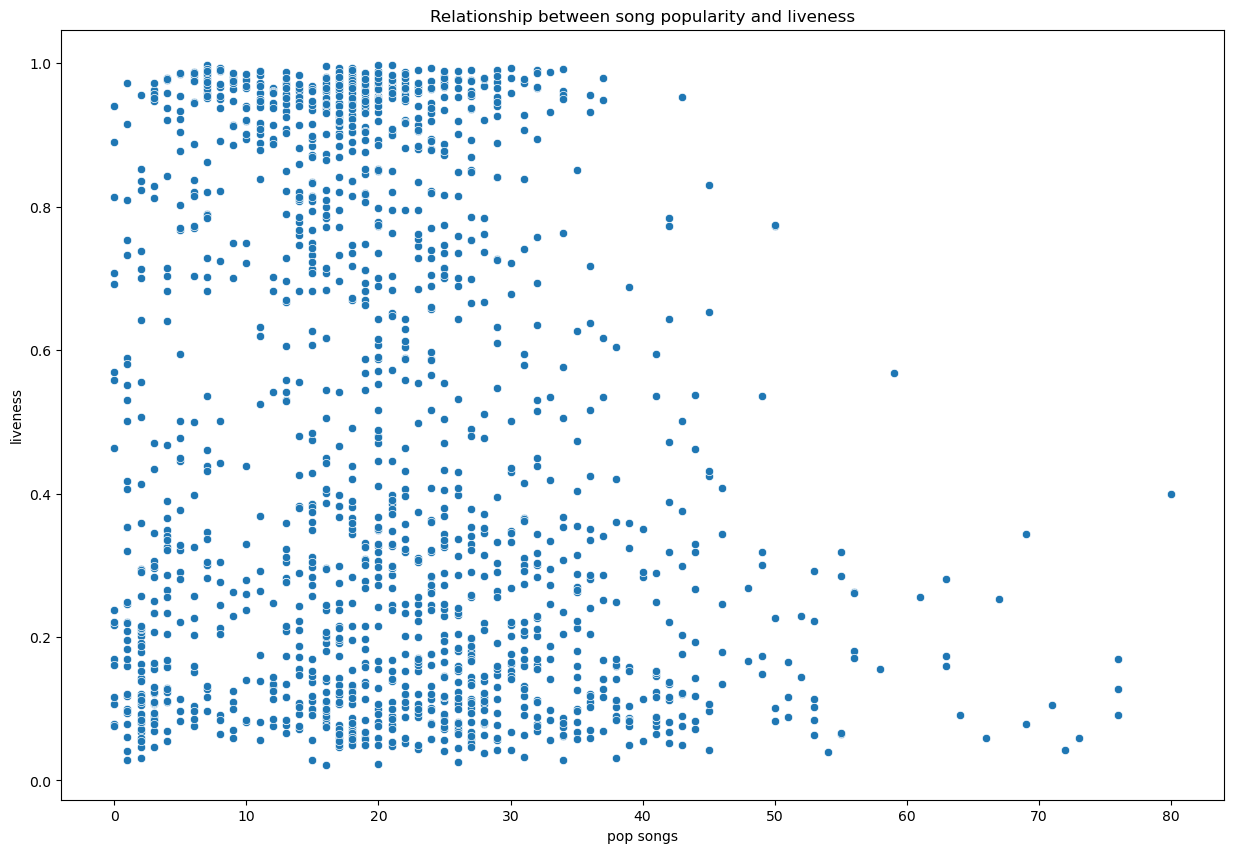

In [14]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='popularity',y='liveness',data=data)
plt.xlabel('pop songs')
plt.ylabel('liveness')
plt.title('Relationship between song popularity and liveness')


C:\Users\yashs\AppData\Local\Temp\ipykernel_25776\530620745.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


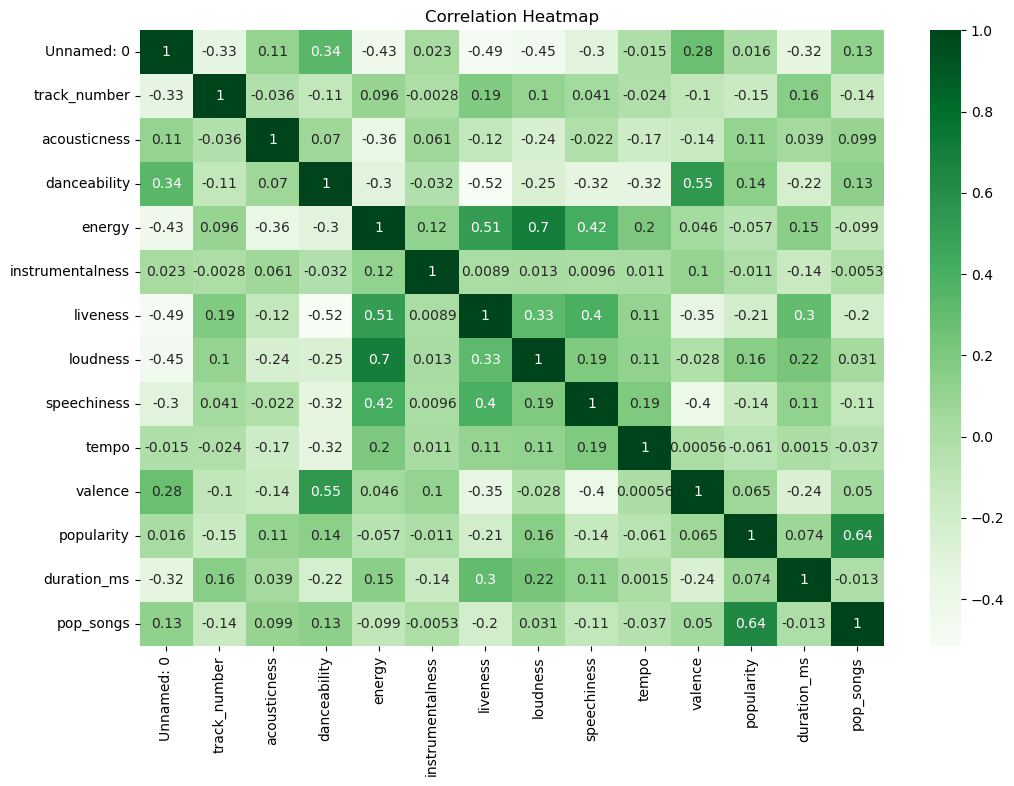

In [15]:

correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens',)
plt.title('Correlation Heatmap')
plt.show()


Text(0, 0.5, 'popularity')

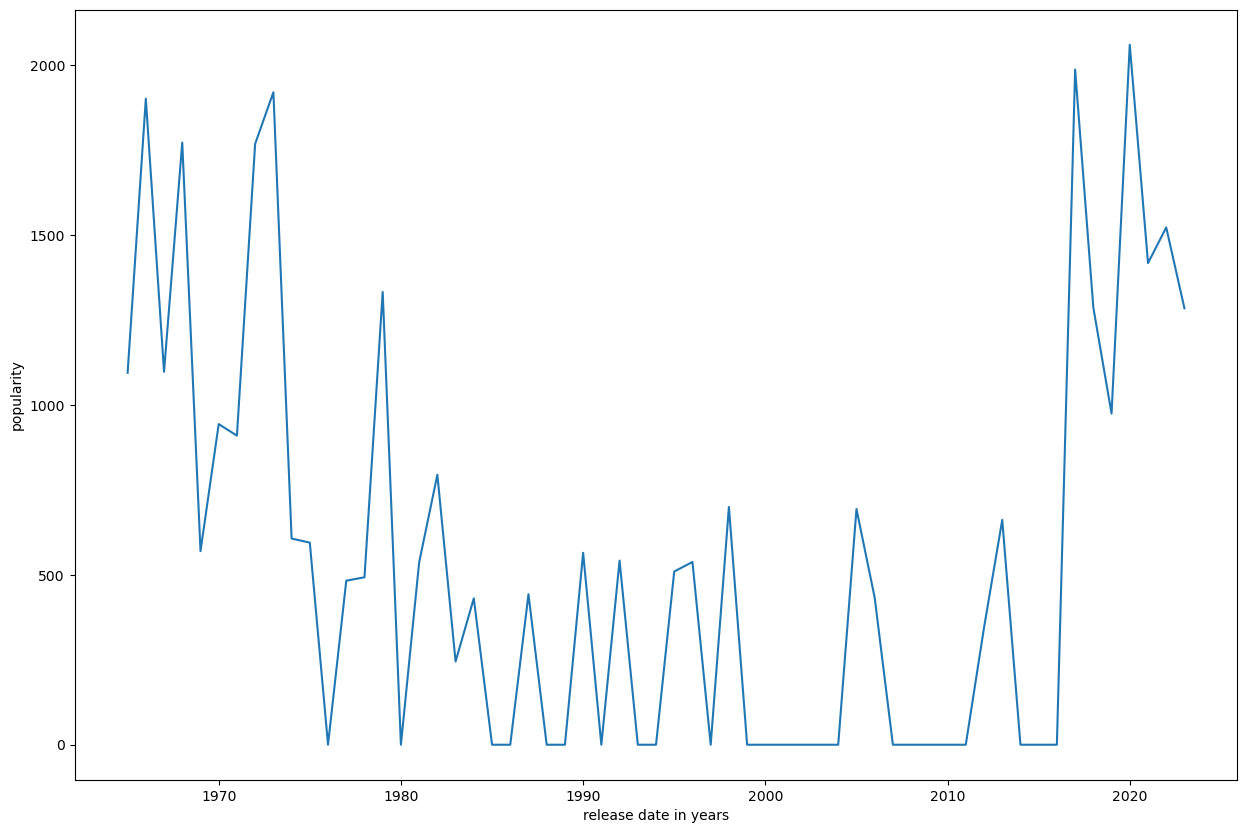

In [16]:
data['release_date']=pd.to_datetime(data['release_date'])
data.set_index('release_date', inplace=True)
yearly_data = data.resample('Y')['popularity'].sum()
plt.figure(figsize=(15,10))
plt.plot(yearly_data.index, yearly_data.values)
plt.xlabel('release date in years')
plt.ylabel('popularity')


In [17]:
features = data[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


C:\Users\yashs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yashs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\yashs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yashs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0, 0.5, 'Inertia')

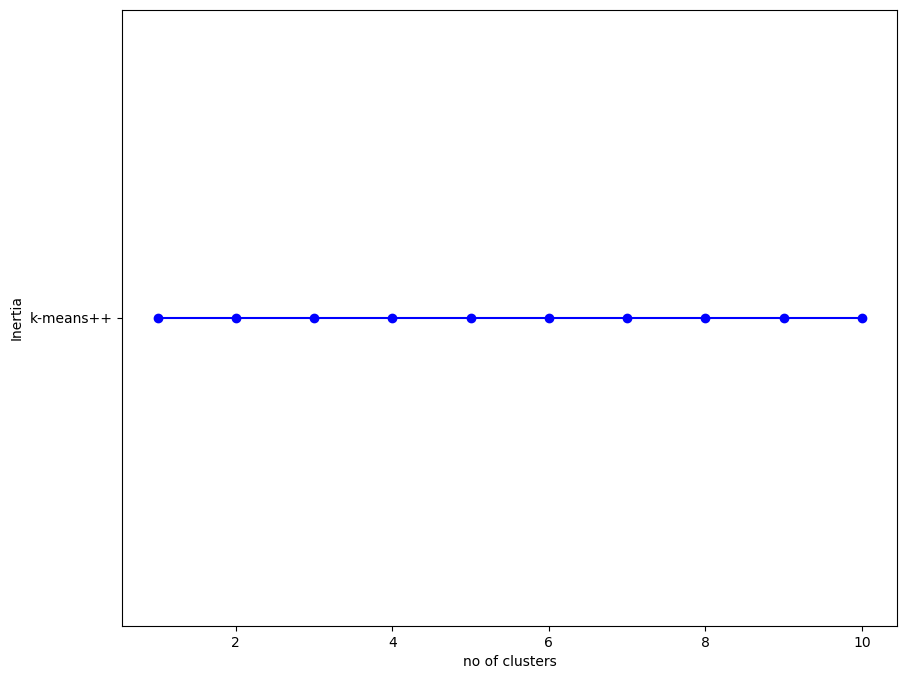

In [18]:
init = []
for n_clusters in range(1,11):
    kmeans = KMeans(n_clusters = n_clusters,random_state = 42)
    kmeans.fit(scaled_features)
    init.append(kmeans.init)

plt.figure(figsize=(10,8))
plt.plot(range(1,11),init, marker='o', linestyle='-', color='b')
plt.xlabel('no of clusters')
plt.ylabel('Inertia')


C:\Users\yashs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yashs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\yashs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yashs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

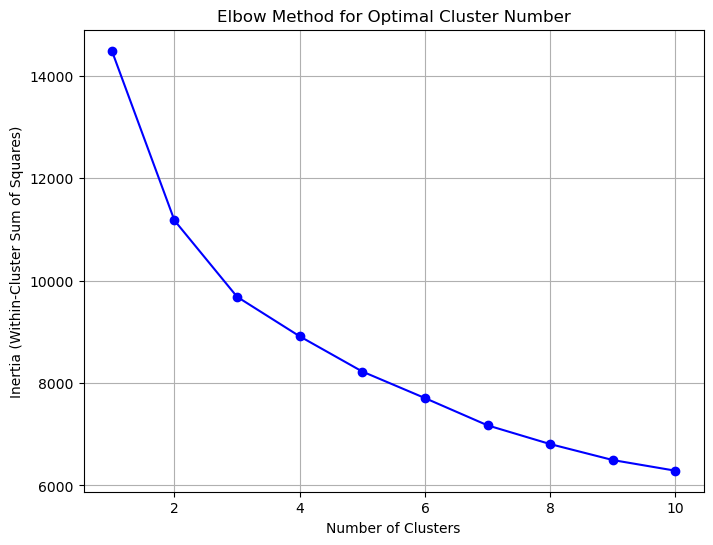

In [19]:
# Use the Elbow Method to find the optimal number of clusters
inertia = []
for n_clusters in range(1, 11):  # Try different numbers of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Cluster Number')
plt.grid(True)
plt.show()
